In [1]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
#read the image from disk
image = cv2.imread('nature.jpg')

#convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
#calculating the histogram of the gray image using numpy
hist,bins = np.histogram(gray_image, 256,[0,256])

#compute the cdf of the histogram
hist_cdf = hist.cumsum()

#normalising
norm_cdf = norm.cdf(hist_cdf)

#equalization of the gray image
eq_image = cv2.equalizeHist(gray_image)

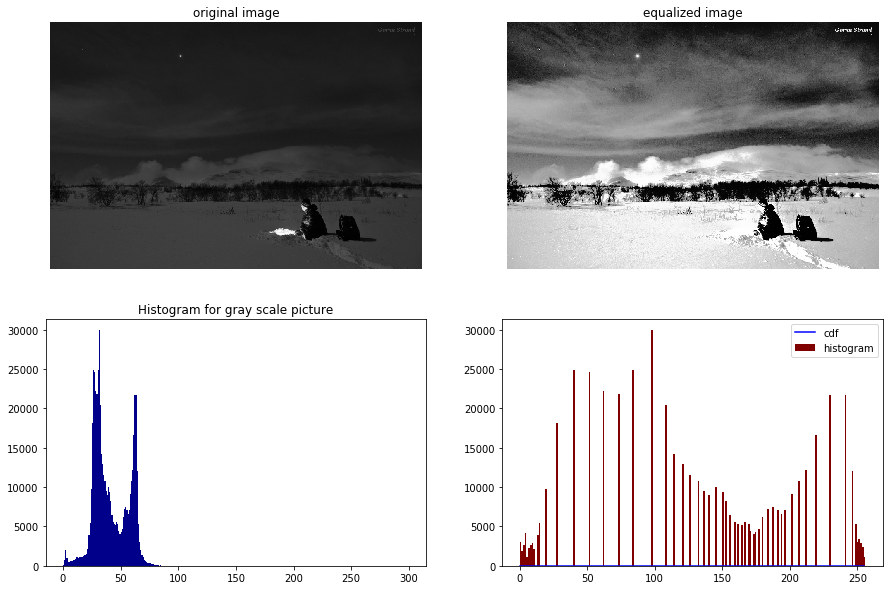

In [4]:
#new plot with custom size
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.imshow(gray_image, 'gray')
plt.title('original image')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(eq_image, 'gray')
plt.title('equalized image')
plt.axis("off")

plt.subplot(2, 2, 3)
#ravel() returns the flatten array of the gray and hist function plotting a histogram out of it
plt.hist(gray_image.ravel(),300,[0,300], color='darkblue')
plt.title('Histogram for gray scale picture')

plt.subplot(2, 2, 4)
#plotting the normalised cdf and histogram 
plt.plot(norm_cdf, color = 'blue', label='cdf')

#below lines [0, 256] means the range of the x values in histogram
plt.hist(eq_image.ravel(), 200,[0,256],color='maroon', label='histogram')
plt.legend()


plt.show()

Please note that cdf graph abpve is hard to notice as its almost in the range of zero, but it is there. I have tried to equalize it and make it more visible than how it looks now, but left it as it is as it may manipulate the answer.

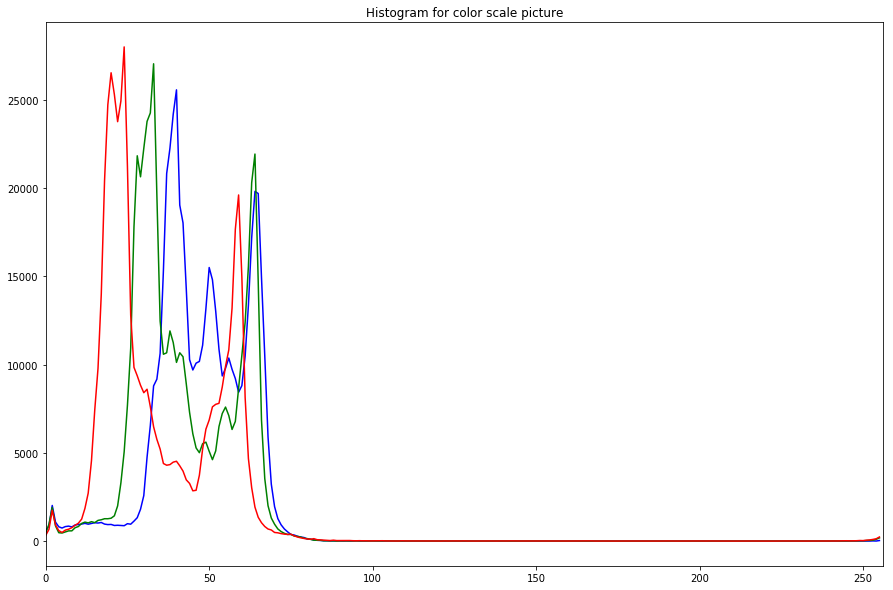

In [5]:
plt.figure(figsize=(15, 10))

color = ('blue','green','red')

#enumerate automatically counts colors in RGB as i have passed it as an argument
for channel,col in enumerate(color):
    
    #gets the histogram value of the color image
    histrogram = cv2.calcHist([image],[channel],None,[256],[0,256])
    plt.plot(histrogram,color = col)
    
    #setting limits turns autoscaling off for the x-axis
    plt.xlim([0,256])
    
    
plt.title('Histogram for color scale picture')

plt.show()